# Code 4.1 Marˇcenko–Pastur Singular Value Formulation (r = 0.1)

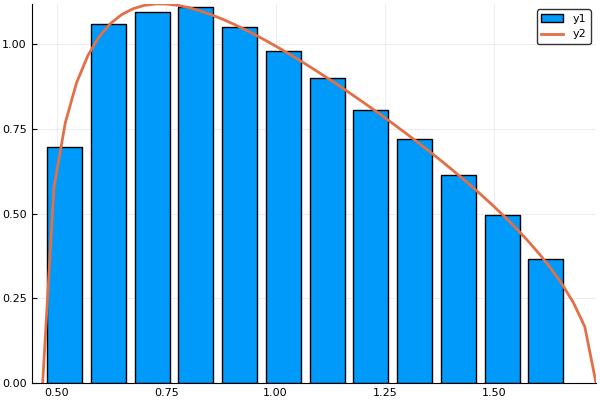

In [88]:
# Experiment : Gaussian Random
# Plot : Histogram of the eigenvalues of X’X/m
# Theory : Marcenko−Pastur as n−>infinity

## Definition of Parameters
t = 1             # Number of trials
r = 0.1           #aspect ratio n/m -->r <= 1
n = 2000          #column width of matrix
m = Int64.(n/r) 
v = []            #eigenvalues
dx = 0.1          #binsize

## Experiment
for i = 1:t
    X = randn(m,n)             # n-by-n matrix of random Gaussians
    s = X'*X                   # symmetrize positive definite matrix
    v = append!(v,eigvals(s))  # eigenvalues
end

## Normalized Eigenvalues
v = v/m
a = (1-sqrt.(r))^2
b = (1+sqrt.(r))^2

## Plot
using StatsBase, Plots #Install using Pkg.add("Plots") and install a pyplot backend using Pkg.add("PyPlot")
v_hist = fit(Histogram,v,closed=:left,a:dx:b)
bar(v_hist.edges,v_hist.weights/(t*dx*n))

## Theory
x = linspace(a,b)
plot!(x,(sqrt.((x-a).*(b-x)))./(2*pi*r*x),linewidth=2)

# Code 4.2 Numerical check of the Cauchy transform of the Marˇcenko–Pastur Law

In [97]:
# Experiment : Calculate Cauchy transform as trace of resolvent of wishart matrix
# Theory : Marˇcenko–Pastur Law¶

m = 2000
n = 1000
r = n/m   # Remeber n/m <= 1 as m -> infinity

a = (1-sqrt.(r))^2
b = (1+sqrt.(r))^2

z = 3  # Should be outside [a,b]
X = randn(m,n)  
W = (X'*X)/m   # Wishart Matrix
[trace(inv(z*eye(n)-W))/n (z-1+r-sqrt.((z-a)*(z-b)))/(2*r*z)]

1×2 Array{Float64,2}:
 0.668628  0.666667

# Code 4.3 Wachter Law in cosine squared format (a = 5, b = 10)

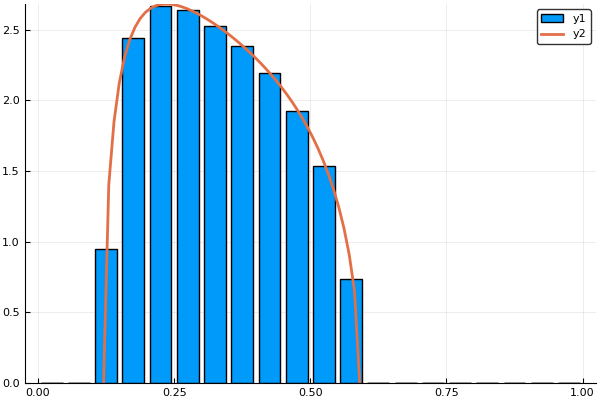

In [133]:
# Experiment : Gaussian Random
# Plot : Histogram of the eigenvalues of (AA’ + BB’ ) ˆ{−1}(AA’)
# Theory : Watcher Law as n−>infinity

## Parameters
t =1000 #trials
a = 5
b = 10 
n=100
m1=round(a*n)
m2=round(b*n) 
m = m1 + m2;
v = [] 
dx = 0.05

##  Experiment
for i = 1:t
    # MANOVA the naive format
    A = randn(m1,n)
    B = randn(m2,n)
    AA = A'*A
    BB = B'*B
    s = (AA+BB)\AA
    v = append!(v,eigvals(s))  
    #TODO: Do this with gsvd
end

c = sqrt.(a/(a+b)*(1-1/(a+b))) 
d = sqrt.(1/(a+b)*(1-a/(a+b))) 

lmax = (c+d).^2
lmin = (c-d).^2

## Plot
using StatsBase, Plots #Install using Pkg.add("Plots") and install a pyplot backend using Pkg.add("PyPlot")
v_hist = fit(Histogram,v,closed=:left,0:dx:1)
bar(v_hist.edges,v_hist.weights/(t*dx*n))

## Theory
x = linspace(lmin,lmax)
plot!(x,(a+b)*(sqrt.((x-lmin).*(lmax-x)))./(2*pi*x.*(1-x)),linewidth=2)

# Code 4.4 Marˇcenko–Pastur Law used in applications

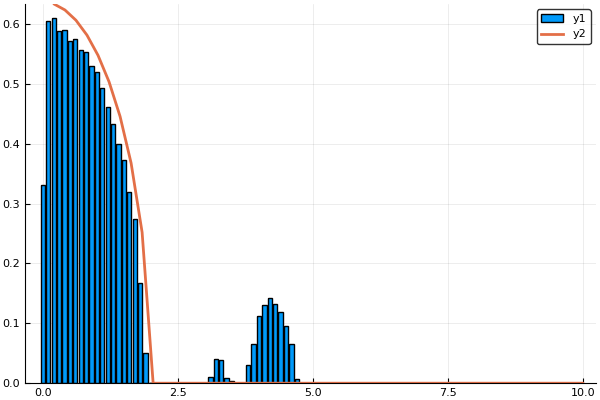

In [174]:
# Experiment : Marcenko−Pastur for application
# Plot : Histogram of the covariance matrix
# Theory : Marcenko−Pastur as n−>infinity


## Parameters
t = 100  # trials
r = 1    # aspect ratio
n = 100   # matrix columns
m = Int64.(n/ r)
v = [] 
dx = 0.1

##  Experiment
for i = 1:t
    a = 1:n
    A = randn(m,n)+4*sqrt.(n)*Diagonal((1:n).<10)
    A = A+sqrt.(n)*Diagonal((1:n).>(n-1))*3
    v = append!(v,svd(A)[2])
end

## Normalized Eigenvalues
v = v/(sqrt.(m))
a = (1-sqrt.(r))
b = 10

## Plot
using StatsBase, Plots #Install using Pkg.add("Plots") and install a pyplot backend using Pkg.add("PyPlot")
v_hist = fit(Histogram,v,closed=:left,(a-dx/2):dx:b)
bar(v_hist.edges,v_hist.weights/(t*dx*n))

## Theory
x = linspace(a,b)
plot!(x,real(sqrt.(((x.^2-a^2).*(2^2-x.^2))+0im))./(pi*x*r),linewidth=2)